# Linear Regression from scratch using numpy

## Generate sample dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
SEED = 1234
NUM_SAMPLES = 50

In [4]:
# Set seed for reproducibility
np.random.seed(SEED)

In [6]:
# Generate synthetic data
# Note the 3.5 here
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10, 20, size=num_samples)
    y = 3.5*X + random_noise # add some noise
    return X, y

In [7]:
# Generate random (linear) data with number of samples = NUM_SAMPLE
#TODO here: one line of code
X, y = generate_data(num_samples=NUM_SAMPLES)
# stack the X and y to get teh whole dataset
#TODO here: one line of code
data = np.vstack([X, y]).T
print (data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [8]:
# Load into a Pandas DataFrame
df = pd.DataFrame(data, columns=["X", "y"])
X = df[["X"]].values
y = df[["y"]].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


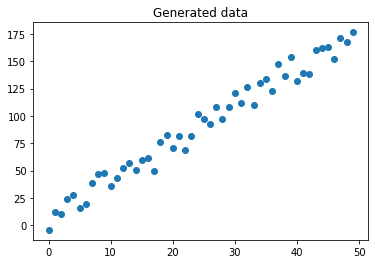

In [9]:
# Scatter plot
plt.title("Generated data")

# Plot a scatter plot of the dataset
plt.scatter(x=df["X"], y=df["y"])
plt.show()

## Using numpy here to build the regression model

### Split the data into train, test, and eval sets

In [13]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [10]:
# Shuffle data
# warning: do not shuffle X and y seprately as this would result into 
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [11]:
X.shape

(50, 1)

In [14]:
# Split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [23]:
# Split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


### Standardize data

In [24]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [25]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [26]:
# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [27]:
np.mean(X_test, axis=0)

array([-0.57188279])

In [28]:
# Check (means should be ~0 and std should be ~1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.6, std: 0.9
mean: -0.6, std: 0.9


### Weights

In [31]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional
print(INPUT_DIM, OUTPUT_DIM)

1 1


In [32]:
# Initialize random weights
#TODO: intitalize the W and b matrices (are they matrices or somethign else )
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


In [33]:
W

array([[0.00704228]])

In [34]:
b

array([[0.]])

### Model

In [35]:
# Forward pass [NX1] · [1X1] = [NX1]
y_pred = np.dot(X_train, W) + b
print (f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


### Loss function

In [36]:
# Loss
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print (f"loss: {loss:.2f}")

loss: 0.99


### Gradients

In [37]:
# Backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
#TODO: implement the db variable
db = -(2/N) * np.sum((y_train - y_pred) * 1)

### Update weights

In [38]:
LEARNING_RATE = 1e-1

In [39]:
# Update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

### Training

In [41]:
NUM_EPOCHS = 100

In [42]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, ))

# Training loop
#TODO: implement the training loop below
for epoch_num in range(NUM_EPOCHS):

    # Forward pass [NX1] · [1X1] = [NX1]
    # TODO: the forward pass here
    y_pred = np.dot(X_train, W) + b
    
    # Loss
    # TODO: The loss function
    loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)

    # Show progress
    if epoch_num%10 == 0:
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    # Backpropagation
    dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
    db = -(2/N) * np.sum((y_train - y_pred) * 1)

    # Update weights
    # TODO the weights
    W += -LEARNING_RATE * dW
    b += -LEARNING_RATE * db

Epoch: 0, loss: 1.018
Epoch: 10, loss: 0.040
Epoch: 20, loss: 0.028
Epoch: 30, loss: 0.028
Epoch: 40, loss: 0.028
Epoch: 50, loss: 0.028
Epoch: 60, loss: 0.028
Epoch: 70, loss: 0.028
Epoch: 80, loss: 0.028
Epoch: 90, loss: 0.028


### Evaluation

In [43]:
# Predictions
pred_train = W*X_train + b
pred_test = W*X_test + b

In [44]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train))
test_mse = np.mean((y_test - pred_test))
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.00, test_MSE: -0.02


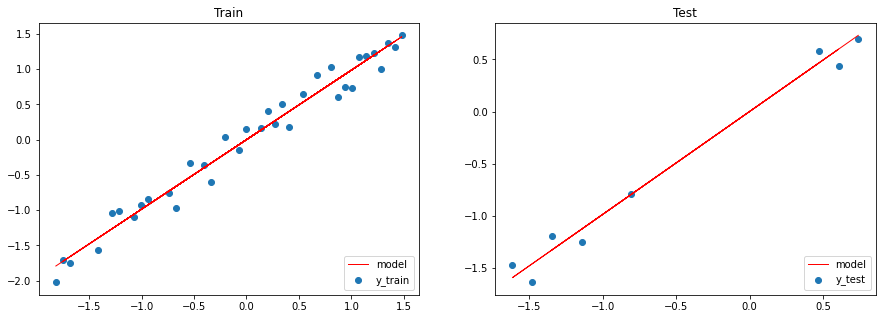

In [45]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()

### Interpretability

In [46]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.4X + 7.8
